### **Importing required libraries**

In [1]:
# import thr required libraries

import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score




### **Declare the directory**

In [2]:
# check the current working directory
current_directory = os.getcwd()
print ("Current working directory : " , current_directory)

# define the directory of data set
data_direcory = "C:/Users/Avishka Sandeepa/OneDrive - University of Moratuwa/GitHub/Traffic-Signs-Recognition/main"
# chane the current directory to the data directory
os.chdir(data_direcory)

# chek the working directory again after changing
current_directory = os.getcwd()
print ("Current working directory : " , current_directory)

# define the each folder directories for training and testing data
train_set = 'Train'
test_set = 'Test'

num_classes = len(os.listdir(train_set)) # returns the no of classes inside the training folder(0 to 42)
num_classes

Current working directory :  c:\Users\Avishka Sandeepa\OneDrive - University of Moratuwa\GitHub\Traffic-Signs-Recognition\main\codes
Current working directory :  C:\Users\Avishka Sandeepa\OneDrive - University of Moratuwa\GitHub\Traffic-Signs-Recognition\main


43

### **Preprocessing the Images**

In [3]:
# Acess the each and every image

img_data =[]
img_labels = []
 
for index in range(num_classes):   # address all classes  
    path = os.path.join(current_directory,'Train',str(index)) # create the path for each image    
    image_names = os.listdir(path) # list containing names of all images for a running class at that point
    
    
    for image in image_names:
        img = cv.imread(path + '/' + image, cv.IMREAD_COLOR)
        img = cv.resize(img, (32,32)) # resizing all images to one scale
        # convert image data into numy array
        img = np.array(img) 

        img_data.append(img)
        img_labels.append(index)






In [4]:
# lets convert above created list into numpy arrays that helps to model to training

img_data = np.array(img_data)
img_labels = np.array(img_labels)

print(img_data.shape, img_labels.shape)

(39209, 32, 32, 3) (39209,)


In [5]:
# Split into training and validation data

train_x, val_x, train_y, val_y = train_test_split(img_data, img_labels, test_size=0.33, random_state=42, shuffle=True)
train_x = train_x/255 
val_x = val_x/255

print("train_x.shape", train_x.shape)
print("val_x.shape", val_x.shape)
print("train_y.shape", train_y.shape)
print("val_y.shape", val_y.shape)

train_x.shape (26270, 32, 32, 3)
val_x.shape (12939, 32, 32, 3)
train_y.shape (26270,)
val_y.shape (12939,)


In [6]:

#This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of
#the input vector and number of columns equal to the number of classes.
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

print("train_y.shape", train_y.shape)
print("val_y.shape", val_y.shape)

train_y.shape (26270, 43)
val_y.shape (12939, 43)


### **Augmenting the image data**

In [7]:
aug_data = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")




### **Build the Model**

In [8]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation = "relu", input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2))) # maxpooling to reduce the dimentions
model.add(Dropout(rate=0.25)) # Add dropout to prevent overfitting 


model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # Add dropout to prevent overfitting 


# Flatten serves as a connection between the convolution and dense layers. 
model.add(Flatten()) 
model.add(Dense(512, activation = "relu"))
model.add(Dropout(rate=0.5)) # Add dropout to prevent overfitting 

# since we have 43 classes add dense with 43 
model.add(Dense(43, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

In [9]:
# train the model

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
history = model.fit(aug_data.flow(train_x, train_y, batch_size=50), epochs = 50, validation_data = (val_x,val_y))

Epoch 1/50


C:\Python38\cv\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


526/526 [==============================] - 81s 152ms/step - loss: 2.0781 - accuracy: 0.3925 - val_loss: 0.5216 - val_accuracy: 0.8352
Epoch 2/50
526/526 [==============================] - 71s 134ms/step - loss: 0.6409 - accuracy: 0.7974 - val_loss: 0.0974 - val_accuracy: 0.9808
Epoch 3/50
526/526 [==============================] - 73s 139ms/step - loss: 0.3236 - accuracy: 0.8990 - val_loss: 0.0434 - val_accuracy: 0.9888
Epoch 4/50
526/526 [==============================] - 79s 150ms/step - loss: 0.2202 - accuracy: 0.9322 - val_loss: 0.0248 - val_accuracy: 0.9948
Epoch 5/50
526/526 [==============================] - 98s 186ms/step - loss: 0.1689 - accuracy: 0.9471 - val_loss: 0.0174 - val_accuracy: 0.9960
Epoch 6/50
526/526 [==============================] - 87s 166ms/step - loss: 0.1357 - accuracy: 0.9572 - val_loss: 0.0155 - val_accuracy: 0.9949
Epoch 7/50
526/526 [==============================] - 86s 164ms/step - loss: 0.1189 - accuracy: 0.9636 - val_loss: 0.0094 - val_accuracy: 0.9

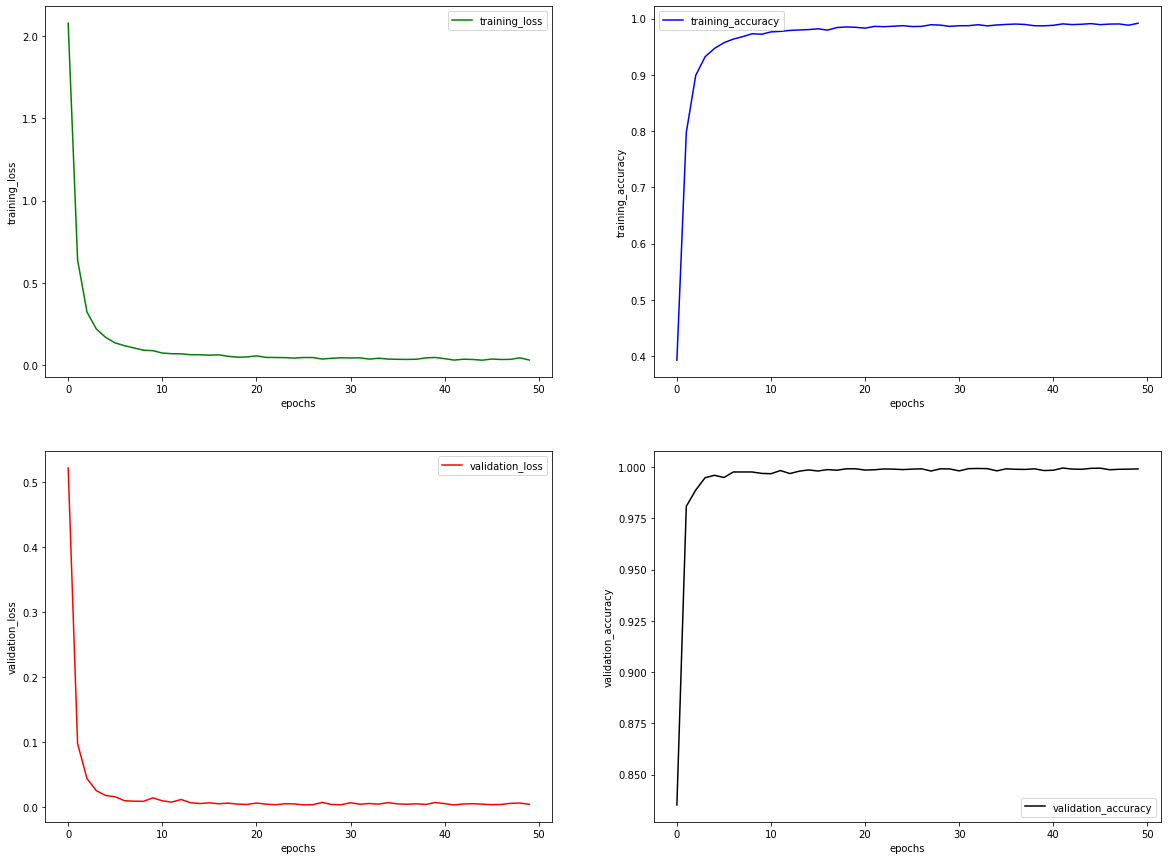

In [26]:
# Plot the lozzes and accuracies

training_loss, training_accuracy, validation_loss, validation_accuracy = (history.history['loss'], history.history['accuracy'], history.history['val_loss'], history.history['val_accuracy'])
fig, axes = plt.subplots(2,2, figsize = (20,15))

axes[0][0].plot(training_loss, color="green")  
axes[0][0].set_xlabel("epochs")
axes[0][0].set_ylabel("training_loss")
axes[0][0].legend(['training_loss'])



#===============================================

axes[0][1].plot(training_accuracy,color="blue")  
axes[0][1].set_xlabel("epochs")
axes[0][1].set_ylabel("training_accuracy")
axes[0][1].legend(['training_accuracy'])

#===============================================

axes[1][0].plot(validation_loss,color="red")  
axes[1][0].set_xlabel("epochs")
axes[1][0].set_ylabel("validation_loss")
axes[1][0].legend(['validation_loss'])

#===============================================

axes[1][1].plot(validation_accuracy,color="black")  
axes[1][1].set_xlabel("epochs")
axes[1][1].set_ylabel("validation_accuracy")
axes[1][1].legend(['validation_accuracy'])

plt.show()
